# Causal Inference 
## Programming Exercise 1
### Sepehr Torab Parhiz, 93100774

This notebook was developed with Python 3.7

In [1]:
import numpy as np
from sklearn.svm import SVR
from hsic import hsic_gam
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

# Q1
## a)

First, the SCM is implemented as a lambda expression that evaluates to Y.

In [2]:
Y = lambda x, N, b, q: x + b * x ** 3 + np.sign(N) * np.abs(N) ** q


Each of the X and N are sampled a million times from a standard normal distribution.
Then, Ys are computed for a linear and a nonlinear model by changing the value of b.

In [3]:
X_samples = np.random.normal(0, 1, 1000000)
N_samples = np.random.normal(0, 1, 1000000)

Y_samples_linear = np.array(
    list(
        map(
            Y,
            X_samples,
            N_samples,
            [0 for i in range(1000000)],
            [1 for j in range(1000000)],
        )
    )
)
Y_samples_nonlinear = np.array(
    list(
        map(
            Y,
            X_samples,
            N_samples,
            [1 for i in range(1000000)],
            [1 for j in range(1000000)],
        )
    )
)


In [4]:
data_linear = pd.DataFrame({'x': X_samples, 'y-linear': Y_samples_linear})
data_nonlinear = pd.DataFrame({'x': X_samples, 'y-nonlinear': Y_samples_nonlinear})


### Joint probability plots of the linear and nonlinear models.

/Users/septp/.virtualenvs/sci/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


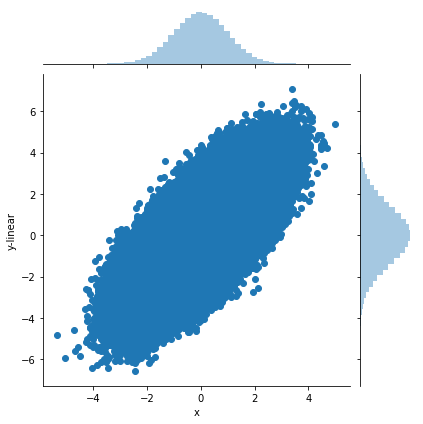

In [43]:
sns.jointplot(x='x', y='y-linear', data=data_linear)


/Users/septp/.virtualenvs/sci/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


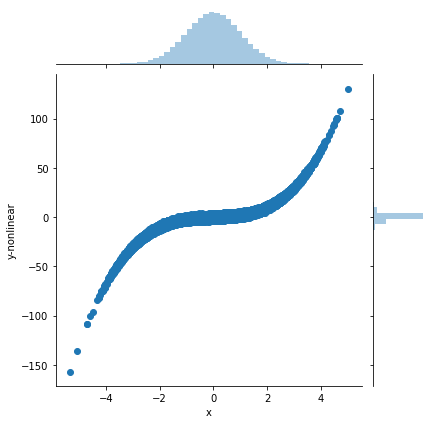

In [6]:
sns.jointplot(x='x', y='y-nonlinear', data=data_nonlinear)

### Conditional probability plots
To find conditional probabilities, I set the values of X and Y to -1, 0, and 1 for $P(Y|X)$ and $P(X|Y)$. Then, the data points that are close to these conditioning values are chosen.

In [7]:
# Linear
yl_xeq0 = Y_samples_linear[np.abs(X_samples - 0) < 1e-4]
yl_xeq1 = Y_samples_linear[np.abs(X_samples - 1) < 1e-4]
yl_xeqm1 = Y_samples_linear[np.abs(X_samples + 1) < 1e-4]

x_yleq0 = X_samples[np.abs(Y_samples_linear - 0) < 1e-4]
x_yleq1 = X_samples[np.abs(Y_samples_linear - 1) < 1e-4]
x_yleqm1 = X_samples[np.abs(Y_samples_linear + 1) < 1e-4]

# Nonlinear
ynl_xeq0 = Y_samples_nonlinear[np.abs(X_samples - 0) < 1e-4]
ynl_xeq1 = Y_samples_nonlinear[np.abs(X_samples - 1) < 1e-4]
ynl_xeqm1 = Y_samples_nonlinear[np.abs(X_samples + 1) < 1e-4]

x_ynleq0 = X_samples[np.abs(Y_samples_nonlinear - 0) < 1e-4]
x_ynleq1 = X_samples[np.abs(Y_samples_nonlinear - 1) < 1e-4]
x_ynleqm1 = X_samples[np.abs(Y_samples_nonlinear + 1) < 1e-4]




/Users/septp/.virtualenvs/sci/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'P(X|Y)')

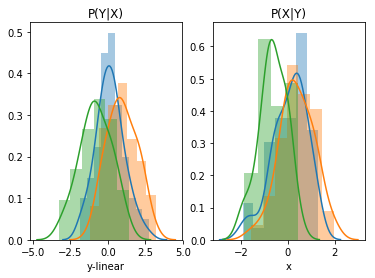

In [45]:
fig, ax =plt.subplots(1,2)
sns.distplot(yl_xeq0, ax=ax[0])
sns.distplot(yl_xeq1, ax=ax[0])
sns.distplot(yl_xeqm1, axlabel='y-linear', ax=ax[0])
ax[0].set_title('P(Y|X)')

sns.distplot(x_yleq0, ax=ax[1])
sns.distplot(x_yleq1, ax=ax[1])
sns.distplot(x_yleqm1, axlabel='x', ax=ax[1])
ax[1].set_title('P(X|Y)')



/Users/septp/.virtualenvs/sci/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'P(X|Y)')

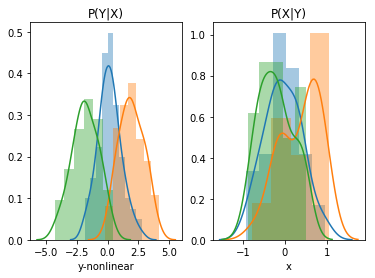

In [47]:
fig, ax =plt.subplots(1,2)
sns.distplot(ynl_xeq0, ax=ax[0])
sns.distplot(ynl_xeq1, ax=ax[0])
sns.distplot(ynl_xeqm1, axlabel='y-nonlinear', ax=ax[0])
ax[0].set_title('P(Y|X)')

sns.distplot(x_ynleq0, ax=ax[1])
sns.distplot(x_ynleq1, ax=ax[1])
sns.distplot(x_ynleqm1, axlabel='x', ax=ax[1])
ax[1].set_title('P(X|Y)')

# fig.show()

# Q1
## b)
Attention: this part can take a long time to compute as I am testing for 150 different configurations of b and q.


In [10]:
b_samples = np.linspace(-1, 1, 15)
q_samples = np.linspace(0.5, 2, 10)

forward_results = []
backward_results = []

### Testing the X -> Y model
For each of the b and q values, the following experiment is repeated 100 times:
1. Sample N and X 300 times from a standard normal distribution.
2. Find the values of Y according to the SCM.
3. Fit an SVR model that predicts Y from X.
4. Find the residuals.
5. Test if residuals are dependent on X using HSIC. If *test_stat* is exceeds *threshold* independence hypothesis is rejected.

For each of the b and q values, the proportion of experiments that were not rejected is stored in *forward_results* along with the values of b and q.

In [11]:
for b in b_samples:
    for q in q_samples:
        independence_acceptance_count = 0

        for k in range(100):
            N_samples = np.random.normal(0, 1, 300)
            X_samples = np.random.normal(0, 1, 300).reshape(-1, 1)
            Y_samples = np.array(
                list(
                    map(
                        Y,
                        X_samples,
                        N_samples,
                        [b for i in range(300)],
                        [q for j in range(300)],
                    )
                )
            ).reshape(-1, 1)
            clf = SVR(gamma='auto')
            clf.fit(X_samples, np.ravel(Y_samples))

            residuals = Y_samples - clf.predict(X_samples).reshape(-1, 1)
            test_stat, threshold = hsic_gam(residuals, X_samples, alph=0.02)
            
            if test_stat <= threshold:
                independence_acceptance_count += 1
                
                
        forward_results.append((b, q, independence_acceptance_count/100))
        

## Testing the Y -> X model
Same procedure as above is repeated for the backward model

In [12]:
for b in b_samples:
    for q in q_samples:
        independence_acceptance_count = 0

        for k in range(100):
            N_samples = np.random.normal(0, 1, 300)
            X_samples = np.random.normal(0, 1, 300).reshape(-1, 1)
            Y_samples = np.array(
                list(
                    map(
                        Y,
                        X_samples,
                        N_samples,
                        [b for i in range(300)],
                        [q for j in range(300)],
                    )
                )
            ).reshape(-1, 1)

            clf = SVR(gamma="auto")
            clf.fit(Y_samples, np.ravel(X_samples))

            residuals = X_samples - clf.predict(Y_samples).reshape(-1, 1)
            test_stat, threshold = hsic_gam(residuals, Y_samples, alph=0.02)

            if test_stat <= threshold:
                independence_acceptance_count += 1

        backward_results.append((b, q, independence_acceptance_count / 100))
        

In [13]:
fw_b0_tuples = np.array([(q, ia) for (b, q, ia) in forward_results if b == 0])
fw_q1_tuples = np.array([(b, ia) for (b, q, ia) in forward_results if q == 1])

bw_b0_tuples = np.array([(q, ia) for (b, q, ia) in backward_results if b == 0])
bw_q1_tuples = np.array([(b, ia) for (b, q, ia) in backward_results if q == 1])

fw_b0_data = pd.DataFrame(fw_b0_tuples, columns=["q", "p-accept"])
fw_q1_data = pd.DataFrame(fw_q1_tuples, columns=["b", "p-accept"])

bw_b0_data = pd.DataFrame(bw_b0_tuples, columns=["q", "p-accept"])
bw_q1_data = pd.DataFrame(bw_q1_tuples, columns=["b", "p-accept"])


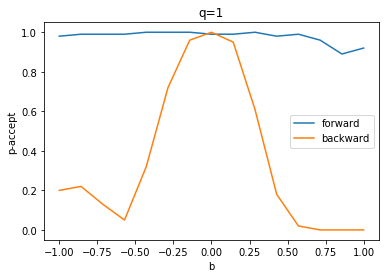

In [48]:
ax = sns.lineplot(x='b', y='p-accept', data=fw_q1_data, label='forward')
ax = sns.lineplot(x='b', y='p-accept', data=bw_q1_data, label='backward')
ax.set_title('q=1')
ax.legend()

Text(0.5, 1.0, 'b=0')

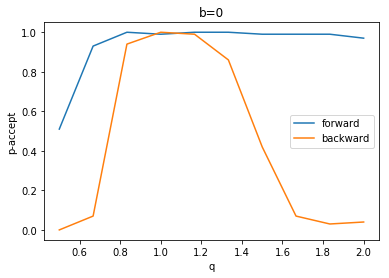

In [40]:
ax2 = sns.lineplot(x="q", y="p-accept", data=fw_b0_data, label='forward')
ax2 = sns.lineplot(x="q", y="p-accept", data=bw_b0_data, label='backward')
ax2.set_title('b=0')

From the figures above, we can see that nonlinear models and non-gassuian noise helps us differentiate between the forward model which is the true causal model from the backward model.

# Q1
## c)
Same procedure as part b is repeated to find the true causal model.

## Old Faithful

In [16]:
faithful = np.loadtxt("faithful.txt", skiprows=26)
faithful[:5, :]

eruption_time = np.array([b for (_, b, _) in faithful])
waiting_time = np.array([c for (_, _, c) in faithful])


### Testing Eruption time -> Waiting time


In [17]:

clf = SVR(gamma="auto")
clf.fit(eruption_time.reshape(-1, 1), waiting_time)

residuals = waiting_time - clf.predict(eruption_time.reshape(-1, 1))

hsic_gam(residuals.reshape(-1, 1), eruption_time.reshape(-1, 1), alph=0.02)


(0.521355799845298, 0.7878944192763103)

*test_stat* is lower than the *threshold*, so the noise is not dependent on eruption time.

### Testing Waiting time -> Eruption time



In [18]:
clf = SVR(gamma="auto")
clf.fit(waiting_time.reshape(-1, 1), eruption_time)

residuals = eruption_time - clf.predict(waiting_time.reshape(-1, 1))

hsic_gam(residuals.reshape(-1, 1), waiting_time.reshape(-1, 1), alph=0.02)


(1.603290238583813, 0.6791149151180458)

*test_stat* is higher than the *threshold*, so the noise is dependent on eruption time.

First model was accepted, while the backward model was rejected. We can state that according to the true causal model, eruption time causes the  waiting time.

# Abalone

In [19]:
column_names = [
    "sex",
    "length",
    "diameter",
    "height",
    "whole weight",
    "shucked weight",
    "viscera weight",
    "shell weight",
    "rings",
]
abalone = pd.read_csv("abalone-data.txt", names=column_names)
shell_lengths = abalone["length"].values
ring_counts = abalone["rings"].values


### Testing Shell length -> Ring counts

In [20]:
clf = SVR(gamma="auto")
clf.fit(shell_lengths.reshape(-1, 1), ring_counts)

ring_residuals = ring_counts - clf.predict(shell_lengths.reshape(-1, 1))

hsic_gam(ring_residuals.reshape(-1, 1), shell_lengths.reshape(-1, 1), alph=0.02)


(3.7519056337833527, 0.6332036484250124)

### Testing Ring counts -> Shell length

In [21]:
clf = SVR(gamma="auto")
clf.fit(ring_counts.reshape(-1, 1), shell_lengths)

length_residuals = shell_lengths - clf.predict(ring_counts.reshape(-1, 1))

hsic_gam(length_residuals.reshape(-1, 1), ring_counts.reshape(-1, 1), alph=0.02)


(5.0560897691140845, 0.6223666073811324)

Both independence hypotheses are rejected, so we cannot decisively pick the true causal model.


In [22]:
# Plotting residuals
# sns.scatterplot(
#     x="Ring counts",
#     y="residuals",
#     data=pd.DataFrame({"Ring counts": ring_counts, "residuals": length_residuals}),
# )


In [23]:
# sns.scatterplot(
#     x="shell length",
#     y="residuals",
#     data=pd.DataFrame({"shell length": shell_lengths, "residuals": ring_residuals}),
# )


# Q2
I use an adjacency matrix to model the DAG. (i, j) entry of the matrix is one if there is a directed edge from i to j. 

Row number is mapped to the variables as follows: {0: 'w', 1: 'x', 2: 'y', 3: 'z'}

In [24]:
# Q2
dag_data = pd.read_csv("dag.csv")
dag_data = dag_data.drop(labels=["Unnamed: 0"], axis=1)
dag_data.head()


,w,x,y,z
0,-1.494550,1.759289,5.141853,-0.394895
1,-2.294998,5.233398,6.630356,-1.865369
2,-2.300008,5.325657,6.046011,-2.310479
3,2.036510,4.013274,5.679255,-2.106526
4,-1.794607,2.602814,5.029331,-0.340335


In [25]:
# w, x, y, z
nodes_dict = {0: "w", 1: "x", 2: "y", 3: "z"}
good_dags = []


Every possible DAG is tried. After assigning the directions in each DAG, each node is checked as follows. 

First, the parents of the node are found by checking the respective column of the node for elements that are one in the adjacency matrix. Then, a SVR trained to regress the node from data of it's parents. Next, residuals are computed and a HSIC test is run to test if independence hypothesis is rejected or not. If the HSIC test rejects, *check_nodes* returns False and the current DAG is discarded. If none of the tests fail for a DAG, *check_nodes* returns True and that DAG is added to the good_dags list.

It can be seen that the only DAG that is not rejected is the one where W is the parent of X and Y, and Z is the child of X and Y.



In [49]:
def check_nodes():
#     print(adjacency_matrix)
    for i in range(4):
        parents_inds = np.nonzero(adjacency_matrix[:, i])[0]
        if parents_inds.shape[0] != 0:
            parents_names = []
            for parent_ind in parents_inds:
                parents_names.append(nodes_dict[parent_ind])

            parents_data = dag_data[parents_names].values
            node_data = dag_data[nodes_dict[i]].values

            clf = SVR(gamma="auto")
            clf.fit(parents_data, node_data)

            residuals = node_data.reshape(-1, 1) - clf.predict(parents_data).reshape(
                -1, 1
            )
            test_stat, threshold = hsic_gam(residuals, parents_data, alph=0.02)

            if test_stat > threshold:
                return False

    return True


In [50]:
for wx in [(0, 1), (1, 0)]:
    for wy in [(0, 2), (2, 0)]:
        for yz in [(2, 3), (3, 2)]:
            for xz in [(1, 3), (3, 1)]:
                adjacency_matrix = np.zeros((4, 4))
                adjacency_matrix[wx] = 1
                adjacency_matrix[wy] = 1
                adjacency_matrix[xz] = 1
                adjacency_matrix[yz] = 1

                flag = check_nodes()
                if flag is True:
                    good_dags.append((wx, wy, yz, xz))


In [51]:
good_dags

[((0, 1), (0, 2), (2, 3), (1, 3)), ((0, 1), (0, 2), (2, 3), (1, 3))]

In [52]:
a = good_dags[0]
adj = np.zeros((4, 4))
for tu in a:
    adj[tu] = 1
pd.DataFrame(adj, columns=['w', 'x', 'y', 'z'])

,w,x,y,z
0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0


The matrix above shows the directions of the true causal model.
w -> x

w -> y

x -> z

y -> z
